# Setores Censitários

## Fontes:

ftp://geoftp.ibge.gov.br/recortes_para_fins_estatisticos/malha_de_setores_censitarios/censo_2010/base_de_faces_de_logradouros/RJ/

Identificar código do município: https://cidades.ibge.gov.br/brasil/rj/rio-de-janeiro/panorama

### Importando  

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd

In [2]:
import os
import zipfile
import shutil

### Extraindo arquivos compactados

In [3]:
#criar diretório temporário
dir = '../01.Dados/Mapas/RJ-SETOR/TEMP'
if not os.path.exists(dir):
    os.makedirs(dir)

In [7]:
#Preenchendo o diretório.
filenames = []
for root, dirs, files in os.walk('../01.Dados/Mapas/RJ-SETOR/DADOS'):
    filenames = files
    
filenames

['33045570506.zip',
 '33045570507.zip',
 '33045570508.zip',
 '33045570509.zip',
 '33045570510.zip',
 '33045570511.zip',
 '33045570512.zip',
 '33045570513.zip',
 '33045570514.zip',
 '33045570515.zip',
 '33045570516.zip',
 '33045570517.zip',
 '33045570519.zip',
 '33045570520.zip',
 '33045570521.zip',
 '33045570522.zip',
 '33045570523.zip',
 '33045570524.zip',
 '33045570525.zip',
 '33045570526.zip',
 '33045570527.zip',
 '33045570528.zip',
 '33045570529.zip',
 '33045570530.zip',
 '33045570531.zip',
 '33045570532.zip',
 '33045570533.zip',
 '33045570534.zip',
 '33045570535.zip',
 '33045570536.zip',
 '33045570537.zip',
 '33045570538.zip',
 '33045570539.zip']

In [9]:
#extrair dentro do diretório temp
for item in filenames:
    # lendo o arquivo
    zip_ref = zipfile.ZipFile('../01.Dados/Mapas/RJ-SETOR/DADOS/' + item, 'r')
    #extraindo o arquivo
    zip_ref.extractall(dir)
    #Fechando a pasta 
    zip_ref.close()

In [11]:
#Identificando o nome padrão dos arquivos
filenames[0]

'33045570506.zip'

In [13]:
# Removendo o '.zip' do nome dos arquivos
filenames[0][:-4]

'33045570506'

In [16]:
# Criando um list comprehention dos arquivos 
# utiliza o geopandas para criar uma lista de GeoDataFrames
# ~~~Deve-se utilizar a linha de código na célula abaixo dentro do concat
[gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames]

[       ID1       CD_GEOCODI    TIPO    CD_GEOCODB     NM_BAIRRO CD_GEOCODD  \
 0   400341  330455705060018  URBANO  330455705004          Caju  330455705   
 1   400342  330455705060019  URBANO  330455705004          Caju  330455705   
 2   400343  330455705060020  URBANO  330455705004          Caju  330455705   
 3   400344  330455705060021  URBANO  330455705004          Caju  330455705   
 4   400347  330455705060024  URBANO  330455705003  Santo Cristo  330455705   
 ..     ...              ...     ...           ...           ...        ...   
 70  401470  330455705060071  URBANO  330455705003  Santo Cristo  330455705   
 71  401471  330455705060072  URBANO  330455705004          Caju  330455705   
 72  401472  330455705060073  URBANO  330455705004          Caju  330455705   
 73  401473  330455705060074  URBANO  330455705004          Caju  330455705   
 74  401474  330455705060075  URBANO  330455705004          Caju  330455705   
 
         NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCO

In [17]:
# utilizando o pandas para criar um df / gdf
setor = pd.concat([gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames], ignore_index = True)

In [18]:
# eliminando os arquivos temporários
shutil.rmtree(dir)

In [19]:
setor

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry
0,400341,330455705060018,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.2127456513088 -22.8752532782879,..."
1,400342,330455705060019,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.2131379980493 -22.8749328328656,..."
2,400343,330455705060020,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.2132713666263 -22.8730867476421,..."
3,400344,330455705060021,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.2115021597463 -22.8742318574333,..."
4,400347,330455705060024,URBANO,330455705003,Santo Cristo,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.2074274030339 -22.9073057629998,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,411867,330455705390216,URBANO,330455705043,Cordovil,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.2933324349621 -22.8182946129293,..."
10500,411868,330455705390217,URBANO,330455705043,Cordovil,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.2932871915211 -22.8192864459177,..."
10501,411869,330455705390218,URBANO,330455705045,Vigário Geral,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.3097341255393 -22.8090593598805,..."
10502,411870,330455705390219,URBANO,330455705045,Vigário Geral,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,POLYGON ((-43.31543780658139 -22.8129293919243...


### identificando o tipo da variável setor

In [20]:
type(setor)

geopandas.geodataframe.GeoDataFrame

### Identificando e modificando o tipo de CRS

In [21]:
setor.crs

{'init': 'epsg:4674'}

In [22]:
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [25]:
setor.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

### Visualização dos setores censitários do município do Rio de Janeiro

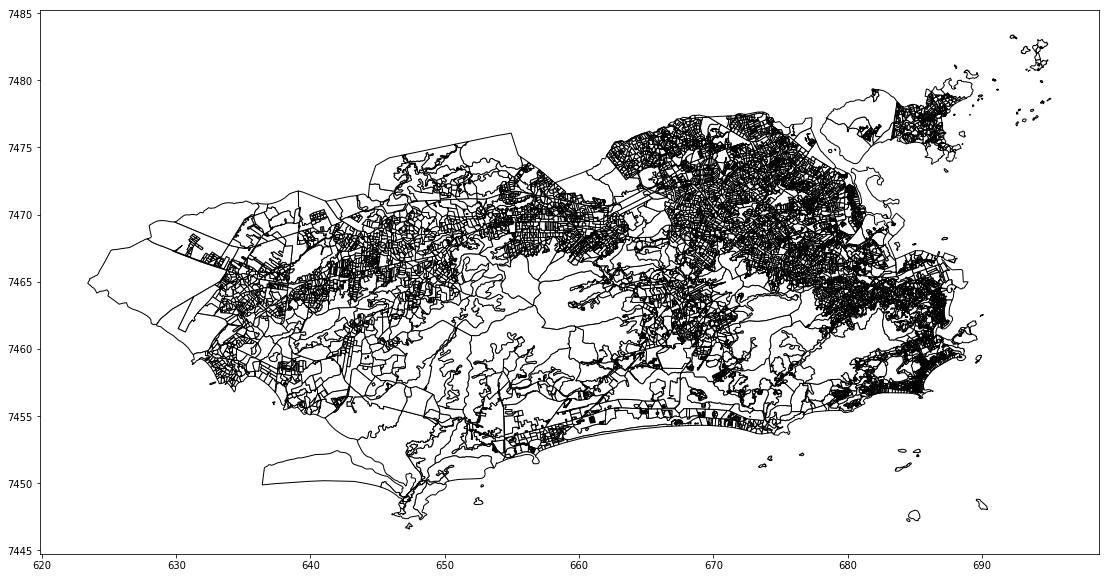

In [26]:
setor.plot(color = 'white', edgecolor = 'black', figsize = (20, 10))

### Salvando o shapefile

In [27]:
setor.to_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')

In [28]:
botafogo = setor[setor['NM_BAIRRO'] == 'Botafogo']

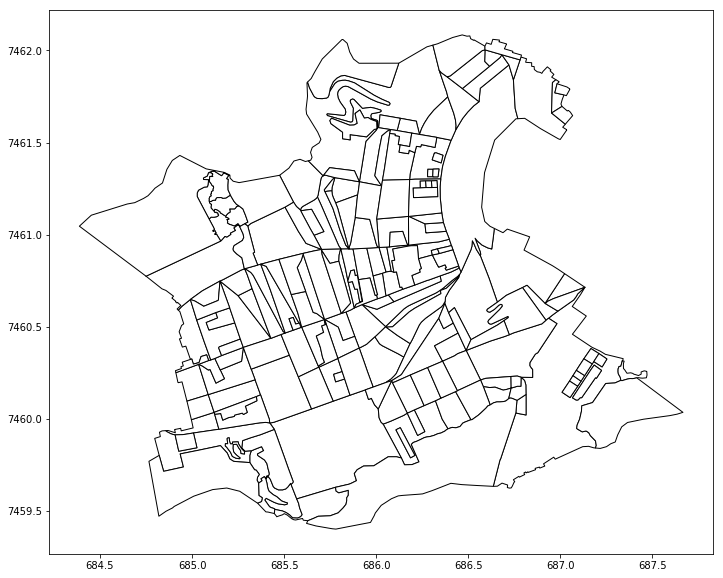

In [29]:
botafogo.plot(color = 'white', edgecolor = 'black', figsize = (20, 10))